In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [11]:
os.chdir('../RawLidarData/Veteran/OutputFile/OutputTrajs/')

FileNotFoundError: [Errno 2] No such file or directory: '../RawLidarData/Veteran/OutputFile/OutputTrajs/'

In [165]:
Trajs = pd.read_csv('Trajctories.csv')

In [166]:
Traj_set = []
for traj in Trajs.groupby('ObjectID'):
    Traj_set.append(traj[1])


In [167]:
Traj_coords = []
Traj_len = []
Traj_v = []
for traj in Traj_set:
    coord = np.array(traj.loc[:,['Coord_X_est','Coord_Y_est']])
    if len(coord) < 20:
        continue
    velocity = np.array(traj.loc[:,'Speed_est'])
    Traj_len.append(len(coord))
    Traj_coords.append(coord)
    Traj_v.append(velocity)

In [168]:
total_v = np.concatenate(Traj_v)

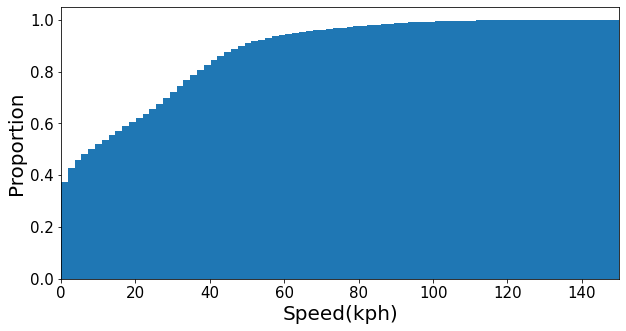

In [169]:
plt.figure(figsize=(10,5))
plt.hist(total_v,density=True,cumulative=True,bins=100)
plt.xlim(0,150)
plt.xlabel('Speed(kph)',fontsize = 20)
plt.ylabel('Proportion',fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.savefig('../../../../Presentation/FIG/PORTION.png',dpi = 600)
plt.show()

In [170]:
from dtaidistance.dtw_ndim import distance_fast
from dtaidistance.dtw_ndim import distance
from tqdm import tqdm

In [171]:
dis_mat = np.zeros((len(Traj_coords),len(Traj_coords)))
for i in tqdm(range(dis_mat.shape[0])):
    # print(i)
    for j in range(dis_mat.shape[0]):
        if i<j:
            dis_mat[i,j] = distance_fast(Traj_coords[i],Traj_coords[j])
np.save('dis_mat.npy',dis_mat)
dis_mat = dis_mat + dis_mat.T

100%|██████████| 1034/1034 [01:01<00:00, 16.75it/s] 


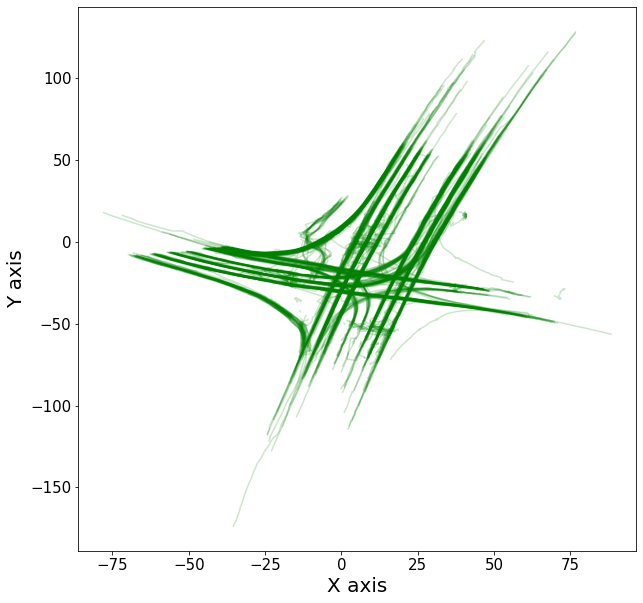

In [172]:
plt.figure(figsize=(10,10))
for traj in Traj_coords:
    plt.plot(traj[:,0],traj[:,1],c = 'g',alpha = 0.2)
plt.xlabel('X axis',fontsize = 20)
plt.ylabel('Y axis',fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.savefig('../../../../Presentation/FIG/RESULT.png',dpi = 600)
plt.show()

In [173]:
from sklearn.cluster import DBSCAN

In [181]:
np.random.seed(20)
color_map = np.random.random((100,3))
color_map = np.concatenate([color_map,np.array([[1,1,1]])])
db = DBSCAN(eps = 31,min_samples=7,metric='precomputed')

In [182]:
labels = db.fit_predict(dis_mat)
np.unique(labels,return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21]),
 array([326,  40,  19, 136, 126,  97,  35,  30,  33,  13,  11,  16,  29,
         47,   8,  13,   7,   8,   8,   9,   8,   7,   8]))

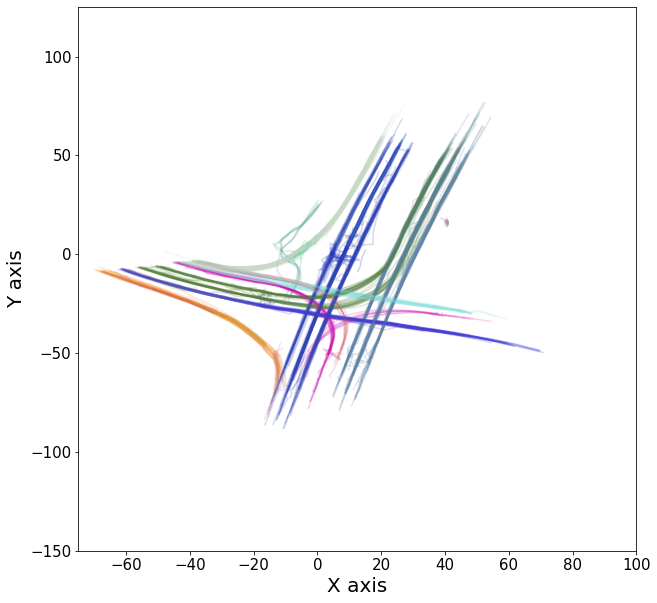

In [183]:
plt.figure(figsize=(10,10))
for i,traj in enumerate(Traj_coords):
    if labels[i] == -1:
        continue
    plt.plot(traj[:,0],traj[:,1],c = color_map[labels[i]],alpha = 0.2)
plt.xlabel('X axis',fontsize = 20)
plt.ylabel('Y axis',fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim(-75,100)
plt.ylim(-150,125)
# plt.savefig('../../../../Presentation/FIG/RESULT_dtw.png',dpi = 600)
plt.show()

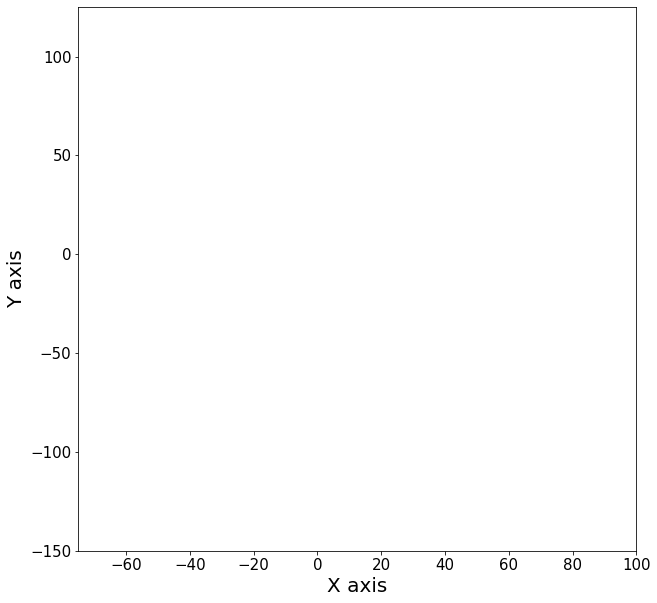

In [184]:
plt.figure(figsize=(10,10))
for i,traj in enumerate(Traj_coords):
    if labels[i] == -1:
        plt.plot(traj[:,0],traj[:,1],c = color_map[labels[i]])

plt.xlabel('X axis',fontsize = 20)
plt.ylabel('Y axis',fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim(-75,100)
plt.ylim(-150,125)
# plt.savefig('../../../../Presentation/FIG/RESULT_dtw.png',dpi = 600)
plt.show()

In [203]:
from scipy.optimize import linear_sum_assignment

In [204]:
ass_mat = np.array([
    [1,0,0,0,0,0],
    [0,1,0,0,0,0],
    [0,0,0,1,0,0],
    [0,0,0,0,1,1],
    [0,0,0,0,0,0]]
)



In [205]:
linear_sum_assignment(ass_mat)

(array([0, 1, 2, 3, 4]), array([1, 0, 2, 3, 4]))

In [197]:
ass_glb,ass_lab = [],[]
ass_glb_fur,ass_lab_fur = [],[]
for i,p in enumerate(ass_mat):
    if (p != 0).sum() == 1:
        ass_glb.append(i)
        ass_lab.append(np.where(p!=0)[0][0])
    else:
        ass_glb_fur.append(i)
        ass_lab_fur.append(np.where(p!=0)[0])
if len(ass_lab_fur) > 0:
    for 
        

SyntaxError: invalid syntax (1247483433.py, line 11)

In [195]:
ass_glb_fur

[3]

In [196]:
ass_lab_fur

[array([4, 5])]

In [193]:
ass_glb

[0, 1, 2]

In [192]:
ass_lab

[0, 1, 3]

In [187]:
ass_mat

array([[1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 1]])